In [1]:
import pandas as pd
import numpy as np
import seaborn
import itertools
import matplotlib.pyplot as plt
from pathlib import Path

seaborn.set_context("paper")
seaborn.set_theme()
%matplotlib inline

In [2]:
def read_csv(fname):
    print(fname)
    df = pd.read_csv(fname)
    s = str(fname).split("/")
    df['model'] = s[1]
    compiler, arch, routine = s[2].split(".")[0:3]
    df['arch'] = arch
    df['compiler'] = compiler
    df['routine'] = routine
    return df

In [3]:
df = pd.concat(read_csv(f) for f in Path(".").glob("../*/*.csv"))

../openacc/nvidia.a100.parallel.csv
../openacc/nvidia.v100.parallel.csv
../openacc/nvidia.skylake.serial.csv
../openacc/nvidia.v100.serial.csv
../openacc/nvidia.a100.serial.csv
../openacc/nvidia.skylake.parallel.csv


In [4]:
df.head()

iteration  n      time    model  arch compiler   routine
0          1  8  0.000109  openacc  a100   nvidia  parallel
1          2  8  0.000037  openacc  a100   nvidia  parallel
2          3  8  0.000036  openacc  a100   nvidia  parallel
3          4  8  0.000035  openacc  a100   nvidia  parallel
4          5  8  0.000036  openacc  a100   nvidia  parallel

In [5]:
df['log2n'] = np.log2(df['n'])
df['rate'] = df['n'] / df['time']

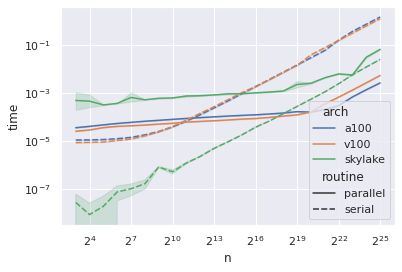

In [6]:
ax = seaborn.lineplot(data=df, x='n', y='time', hue='arch', style='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
plt.savefig("prefix_sum_rate_by_arch_version.pdf")

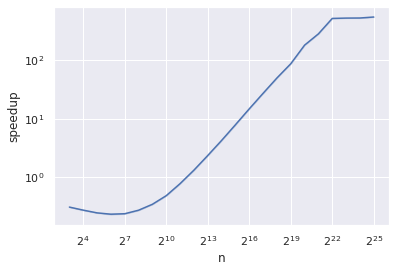

In [8]:
x = pd.read_csv('../openacc/nvidia.a100.serial.csv')
y = pd.read_csv('../openacc/nvidia.a100.parallel.csv')
y['speedup'] = x['time']/ y['time']
#y['log2n'] = np.log2(y['n'])

ax = seaborn.lineplot(data=y, x='n', y='speedup')
ax.set_yscale('log')
ax.set_xscale('log', base=2)
plt.savefig("prefix-sum-a100-speedup.pdf")

In [11]:
y['speedup'].astype(int).max()

584